<a href="https://colab.research.google.com/github/Rodsoares1/datascience/blob/master/AnaliseExploratoriaSaude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns                     
import matplotlib.pyplot as plt             
%matplotlib inline     


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/GPA/dfinal.xlsx')

In [ ]:
#df = pd.read_excel('/content/drive/MyDrive/GPA/ATESTADOS.xlsx')

In [ ]:
#df1 = df1.dropna(subset=['EMP'])

In [ ]:
#df1 = df1.dropna(subset=['Nome'])

In [ ]:
dados = df.drop(["Ano", "Mês", "DESC_ESTRUT_1_CC", "DESC_ESTRUT_2_CC", "DESC_ESTRUT_3_CC", "DESC_ESTRUT_4_CC", "DESC_ESTRUT_5_CC"], axis=1)

In [ ]:
dados.dtypes


COD_EMPRESA                   int64
COD_CENTRO_CUSTO              int64
MATRICULA                     int64
ÚltimoDeSTATUS               object
GENERO                       object
MUNICIPIO_LOCAL_TRABALHO     object
UF_LOCAL_TRABALHO            object
Tempo_Casa_Anos             float64
Idade_Anos                    int64
DESC_SEGMENTO                object
SEM CID                       int64
(A00 – B99)                   int64
(C00 – D48)                   int64
 (D50 – D89)                  int64
(E00 – E90)                   int64
(F00 – F99)                   int64
(G00 – G99)                   int64
(H60 – H95)                   int64
(H00 – H59)                   int64
(I00 – I99)                   int64
(J00 – J99)                   int64
(K00 – K99)                   int64
 (L00 – L99)                  int64
(M00 – M99)                   int64
(N00 – N99)                   int64
(O00 – O99)                   int64
(P00 – P96)                   int64
(Q00 – Q99)                 

In [ ]:
dados.head()

,COD_EMPRESA,COD_CENTRO_CUSTO,MATRICULA,ÚltimoDeSTATUS,GENERO,MUNICIPIO_LOCAL_TRABALHO,UF_LOCAL_TRABALHO,Tempo_Casa_Anos,Idade_Anos,DESC_SEGMENTO,SEM CID,(A00 – B99),(C00 – D48),(D50 – D89),(E00 – E90),(F00 – F99),(G00 – G99),(H60 – H95),(H00 – H59),(I00 – I99),(J00 – J99),(K00 – K99),(L00 – L99),(M00 – M99),(N00 – N99),(O00 – O99),(P00 – P96),(Q00 – Q99),(R00 – R99),(S00 – T98),(U04 – U99),(V01 – Y98),(Z00 – Z99)
0,1,2546,2765284,Ativo,Feminino,Belo Horizonte,MG,4.33,27,LOJA,0,2,0,0,0,3,0,0,0,0,2,0,0,0,0,0,0,0,0,3,2,0,0
1,1,2546,3279960,Ativo,Feminino,Belo Horizonte,MG,3.24,21,LOJA,4,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,2,0,1,0,1
2,1,2546,3507637,Ativo,Feminino,Belo Horizonte,MG,2.66,26,LOJA,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,1,2546,3628825,Ativo,Feminino,Belo Horizonte,MG,2.45,35,LOJA,0,0,0,0,0,0,0,0,0,0,2,2,0,0,2,0,0,0,3,0,0,0,1
4,1,2546,3633713,Ativo,Masculino,Belo Horizonte,MG,2.44,25,LOJA,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados.tail()

,COD_EMPRESA,COD_CENTRO_CUSTO,MATRICULA,ÚltimoDeSTATUS,GENERO,MUNICIPIO_LOCAL_TRABALHO,UF_LOCAL_TRABALHO,Tempo_Casa_Anos,Idade_Anos,DESC_SEGMENTO,SEM CID,(A00 – B99),(C00 – D48),(D50 – D89),(E00 – E90),(F00 – F99),(G00 – G99),(H60 – H95),(H00 – H59),(I00 – I99),(J00 – J99),(K00 – K99),(L00 – L99),(M00 – M99),(N00 – N99),(O00 – O99),(P00 – P96),(Q00 – Q99),(R00 – R99),(S00 – T98),(U04 – U99),(V01 – Y98),(Z00 – Z99)
82466,100,2404,4849744,Demitido,Feminino,Sao Paulo,SP,0.0,0,LOJA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
82467,100,2404,4849949,Demitido,Feminino,Sao Paulo,SP,0.0,0,LOJA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
82468,100,2404,4850068,Demitido,Feminino,Sao Paulo,SP,0.0,0,LOJA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
82469,100,2759,4845978,Demitido,Feminino,Sao Paulo,SP,0.0,0,LOJA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
82470,100,5284,4848969,Demitido,Feminino,Cabo Frio,RJ,0.0,0,LOJA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(dados, title="Pandas Profiling Report")

In [ ]:
profile = ProfileReport(dados, minimal=True)

In [ ]:
profile.to_notebook_iframe()

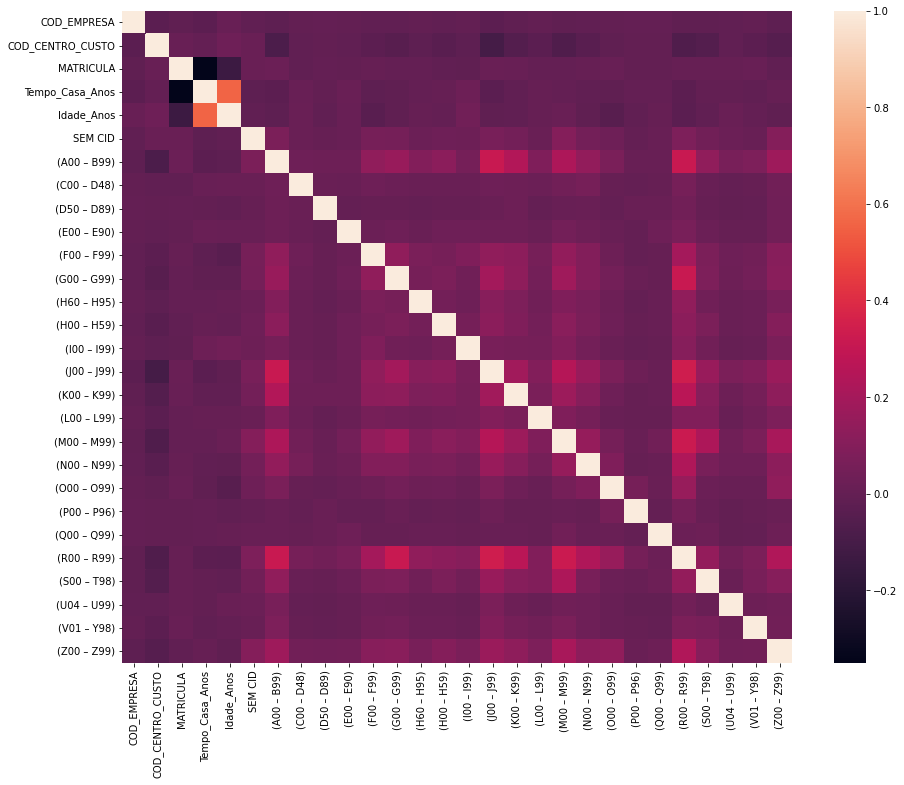

In [ ]:
corr_df = dados.corr(method='pearson')
plt.figure(figsize=(15, 12))
sns.heatmap(corr_df, annot=False)


In [ ]:
corr_df = dados.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,COD_EMPRESA,COD_CENTRO_CUSTO,MATRICULA,Tempo_Casa_Anos,Idade_Anos,SEM CID,(A00 – B99),(C00 – D48),(D50 – D89),(E00 – E90),(F00 – F99),(G00 – G99),(H60 – H95),(H00 – H59),(I00 – I99),(J00 – J99),(K00 – K99),(L00 – L99),(M00 – M99),(N00 – N99),(O00 – O99),(P00 – P96),(Q00 – Q99),(R00 – R99),(S00 – T98),(U04 – U99),(V01 – Y98),(Z00 – Z99)
COD_EMPRESA,1.000000,-0.031290,-0.014079,-0.026025,0.010273,-0.007434,-0.021395,-0.004759,-0.001450,-0.002994,-0.008055,-0.008316,-0.005092,-0.009194,-0.005041,-0.025372,-0.013527,-0.006812,-0.014566,-0.009744,-0.005621,-0.001020,-0.001487,-0.016477,-0.014118,-0.008928,-0.006613,-0.019475
COD_CENTRO_CUSTO,-0.031290,1.000000,0.010338,0.001937,0.034534,0.016215,-0.079676,-0.011917,-0.004705,-0.007728,-0.028165,-0.039296,-0.020946,-0.034194,-0.020730,-0.103919,-0.051074,-0.032707,-0.067459,-0.037719,-0.012839,-0.002995,-0.005303,-0.070292,-0.051864,-0.012167,-0.023907,-0.046986
MATRICULA,-0.014079,0.010338,1.000000,-0.350192,-0.136592,0.014388,0.020919,-0.009230,-0.000149,-0.006375,0.005285,0.001873,-0.001300,-0.008308,-0.017165,0.014631,0.011562,0.001046,-0.001029,0.007066,0.011889,-0.003042,-0.004210,0.007211,0.005657,0.005093,0.010549,-0.008194
Tempo_Casa_Anos,-0.026025,0.001937,-0.350192,1.000000,0.562188,-0.022895,-0.024780,0.009665,-0.003448,0.014410,-0.022590,-0.014012,-0.002050,0.003999,0.025945,-0.031238,-0.011046,0.005161,-0.000691,-0.008647,-0.013405,-0.001585,0.001886,-0.024442,-0.006857,-0.003527,-0.010552,0.004011
Idade_Anos,0.010273,0.034534,-0.136592,0.562188,1.000000,-0.011687,-0.021084,0.014841,-0.008139,0.013337,-0.036971,-0.013762,0.004462,-0.002069,0.041038,-0.016833,-0.009029,0.004793,0.014740,-0.016924,-0.042865,-0.008403,0.004067,-0.031450,-0.010086,0.014215,0.000975,-0.014829
SEM CID,-0.007434,0.016215,0.014388,-0.022895,-0.011687,1.000000,0.072367,0.018029,0.006546,0.012125,0.060394,0.054430,0.022590,0.029660,0.028194,0.062865,0.048195,0.017029,0.101204,0.050173,0.030405,-0.000466,0.011205,0.082198,0.043400,0.023406,0.011864,0.101386
(A00 – B99),-0.021395,-0.079676,0.020919,-0.024780,-0.021084,0.072367,1.000000,0.029987,0.024494,0.028967,0.138076,0.163426,0.094622,0.123274,0.053207,0.318813,0.243975,0.086928,0.226328,0.143071,0.066954,0.009806,0.011870,0.315766,0.138211,0.065661,0.079496,0.178239
(C00 – D48),-0.004759,-0.011917,-0.009230,0.009665,0.014841,0.018029,0.029987,1.000000,0.015138,0.008662,0.034782,0.021885,0.015621,0.018211,0.014419,0.034183,0.026335,0.024036,0.040496,0.060345,0.007641,-0.001419,0.007763,0.057736,0.008570,0.000982,0.003315,0.042255
(D50 – D89),-0.001450,-0.004705,-0.000149,-0.003448,-0.008139,0.006546,0.024494,0.015138,1.000000,0.001623,0.007801,0.004580,-0.001323,0.004298,0.007796,0.017839,0.026565,0.001776,0.010740,0.014354,0.000771,0.013992,0.018635,0.040318,0.004865,-0.002396,0.001540,0.035207
(E00 – E90),-0.002994,-0.007728,-0.006375,0.014410,0.013337,0.012125,0.028967,0.008662,0.001623,1.000000,0.020279,0.031425,0.013986,0.033405,0.033763,0.028556,0.028340,0.014514,0.048499,0.027124,0.013561,-0.001050,0.029692,0.063030,0.021140,0.007464,0.003573,0.044249


In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/GPA/finalajust.xlsx')



In [ ]:
df2 = df2.drop(["Ano", "Mês", "COD_EMPRESA", "COD_CENTRO_CUSTO", "MATRICULA"], axis=1)

In [ ]:
mask = np.triu(np.ones_like(corr_df))

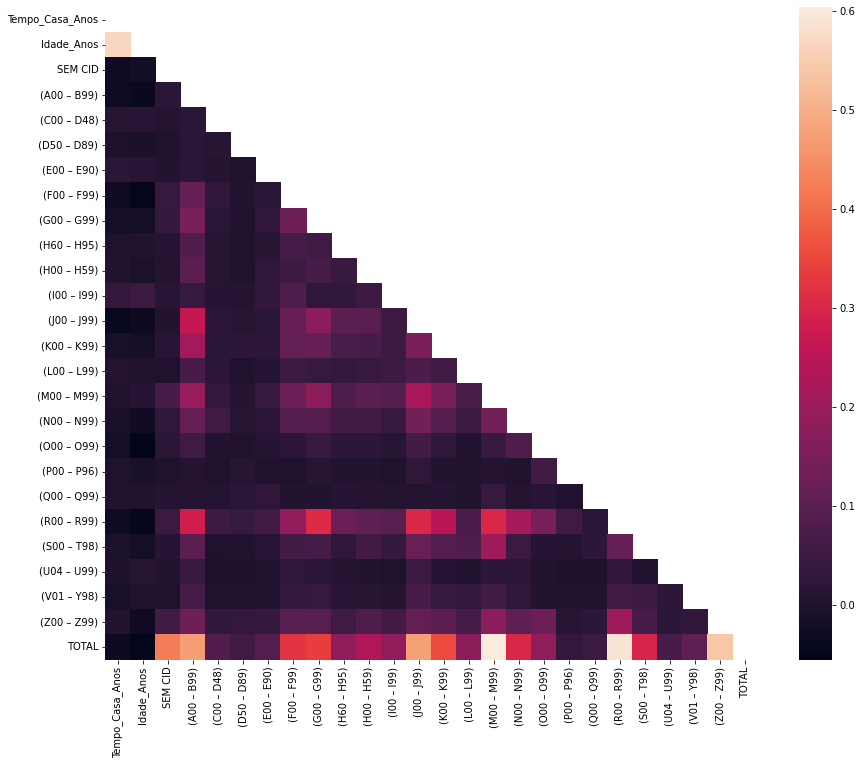

In [ ]:
corr_df = df2.corr(method='pearson')
plt.figure(figsize=(15, 12))
sns.heatmap(corr_df, annot=False, square=True, mask=mask)

In [ ]:
corr_df = df2.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,Tempo_Casa_Anos,Idade_Anos,SEM CID,(A00 – B99),(C00 – D48),(D50 – D89),(E00 – E90),(F00 – F99),(G00 – G99),(H60 – H95),(H00 – H59),(I00 – I99),(J00 – J99),(K00 – K99),(L00 – L99),(M00 – M99),(N00 – N99),(O00 – O99),(P00 – P96),(Q00 – Q99),(R00 – R99),(S00 – T98),(U04 – U99),(V01 – Y98),(Z00 – Z99),TOTAL
Tempo_Casa_Anos,1.000000,0.568513,-0.028993,-0.031629,0.012453,-0.004332,0.018433,-0.028496,-0.017553,-0.002419,0.005463,0.033205,-0.040359,-0.013659,0.006835,-0.000300,-0.010668,-0.016854,-0.001972,0.002455,-0.030944,-0.008256,-0.004168,-0.013194,0.006039,-0.032216
Idade_Anos,0.568513,1.000000,-0.023644,-0.037824,0.016107,-0.010546,0.014790,-0.049373,-0.020922,0.003104,-0.007006,0.047739,-0.034173,-0.018066,0.002606,0.010865,-0.025605,-0.054964,-0.010780,0.004218,-0.047230,-0.019678,0.013282,-0.001836,-0.028715,-0.047968
SEM CID,-0.028993,-0.023644,1.000000,0.021609,0.008460,0.003741,0.005009,0.042354,0.036125,0.011603,0.008644,0.016764,0.004755,0.016158,0.001485,0.068734,0.028106,0.018838,-0.002993,0.007785,0.045724,0.009821,0.003669,-0.002661,0.057007,0.424061
(A00 – B99),-0.031629,-0.037824,0.021609,1.000000,0.018662,0.021663,0.020806,0.119003,0.145184,0.083670,0.101052,0.040101,0.266518,0.213591,0.070322,0.192498,0.119693,0.054099,0.007018,0.007729,0.282859,0.101298,0.042965,0.064013,0.128024,0.474497
(C00 – D48),0.012453,0.016107,0.008460,0.018662,1.000000,0.014491,0.007011,0.030545,0.017554,0.013065,0.013407,0.011731,0.021652,0.019097,0.020531,0.032973,0.055492,0.004893,-0.001988,0.006946,0.049857,0.000774,-0.003604,-0.000014,0.032309,0.082584
(D50 – D89),-0.004332,-0.010546,0.003741,0.021663,0.014491,1.000000,0.001132,0.006528,0.003286,-0.002092,0.002868,0.007004,0.014460,0.024661,0.000718,0.008487,0.012881,-0.000046,0.013827,0.018396,0.038388,0.002593,-0.003764,0.000557,0.032878,0.053360
(E00 – E90),0.018433,0.014790,0.005009,0.020806,0.007011,0.001132,1.000000,0.017104,0.028289,0.012094,0.029962,0.031822,0.019412,0.023093,0.011901,0.043200,0.023390,0.011542,-0.001471,0.029103,0.057550,0.015582,0.004106,0.001112,0.037235,0.084787
(F00 – F99),-0.028496,-0.049373,0.042354,0.119003,0.030545,0.006528,0.017104,1.000000,0.129889,0.063726,0.051110,0.080621,0.117798,0.112564,0.050201,0.126980,0.084210,0.021473,0.000401,0.006548,0.186489,0.059285,0.024895,0.034168,0.095010,0.321687
(G00 – G99),-0.017553,-0.020922,0.036125,0.145184,0.017554,0.003286,0.028289,0.129889,1.000000,0.054645,0.067480,0.029752,0.176871,0.118693,0.038587,0.175218,0.087614,0.043138,0.013152,0.006718,0.307382,0.064001,0.020122,0.039269,0.098089,0.337453
(H60 – H95),-0.002419,0.003104,0.011603,0.083670,0.013065,-0.002092,0.012094,0.063726,0.054645,1.000000,0.042878,0.030418,0.101457,0.072456,0.034376,0.079309,0.056531,0.022607,0.001768,0.009972,0.127431,0.028095,0.008540,0.015336,0.054824,0.183236


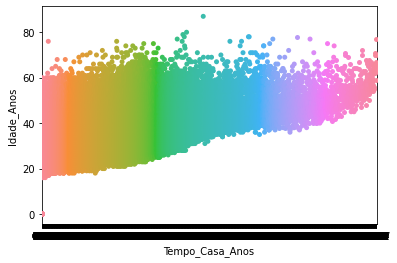

In [ ]:
#sns.stripplot(x='Tempo_Casa_Anos', y='Idade_Anos', data=df2)

In [38]:
df2['Tempo_Casa_Anos']

0        0.00
1        5.98
2        0.00
3        8.79
4        0.00
         ... 
58922    0.02
58923    0.06
58924    0.00
58925    0.04
58926    0.02
Name: Tempo_Casa_Anos, Length: 58927, dtype: float64

Inclusao de nova base de dados

In [66]:

df4 = pd.read_csv('/content/drive/MyDrive/GPA/bases_Oficiais/CADASTRO_0001_20220228.csv', sep=';', encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [67]:
df5 = pd.read_csv('/content/drive/MyDrive/GPA/bases_Oficiais/BENEFICIO_0003_20220228.csv', sep=';', encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [100]:
df_plano = df5.groupby('DESC_BENEFICIO')


In [80]:
type(df_plano)

pandas.core.groupby.generic.DataFrameGroupBy

In [110]:
 df5 = df5.query('COD_TIPO_BENEFICIO=="Convênio"')

In [114]:
df5['DESC_BENEFICIO']


1                        COOPERATIVA DE CRÉDITO
2                             MULTICHEQUE - CBD
3                0035 ODONTO STANDART CBD (70%)
4         1160 MAX 250 ENF C/OBST. D3 CBD (40%)
8                0035 ODONTO STANDART CBD (70%)
                          ...                  
340199                        MULTICHEQUE - CBD
340200           TNQ2 BRADESCO APTO GREEN (40%)
340203                   COOPERATIVA DE CRÉDITO
340204                        MULTICHEQUE - CBD
340205           TNQ2 BRADESCO APTO GREEN (40%)
Name: DESC_BENEFICIO, Length: 223719, dtype: object

In [96]:
df_plano

(40336, 99)

In [97]:
df5.count()

ANO_MES               223719
COD_EMPRESA           223719
CPF                   223719
TIPO_DEPENDENTE       223718
CPF_DEPENDENTE         45631
NOME_DEPENDENTE        54334
COD_TIPO_BENEFICIO    223719
TIPO_BENEFICIO             0
COD_BENEFICIO         223719
DESC_BENEFICIO        223719
VLR_BENEFICIO         223719
VLR_EMPRESA           223719
VLR_COLABORADOR       223719
Unnamed: 13                0
dtype: int64